In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data set
df = pd.read_csv("ecommerce_data.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


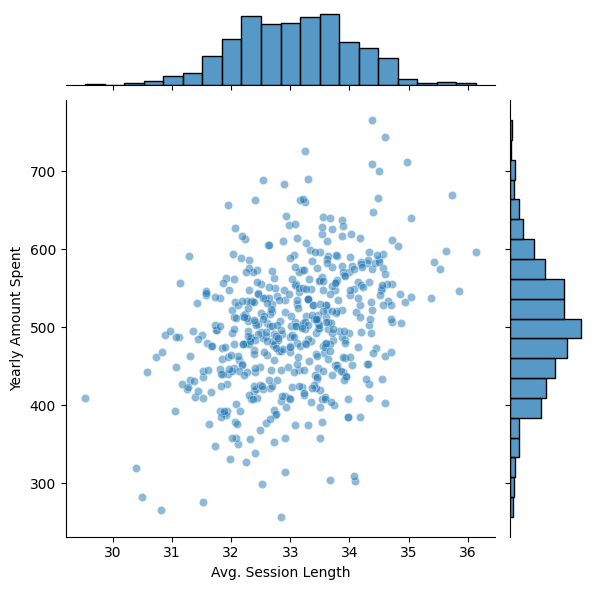

In [6]:
# Visualizing data using seaborn
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df,alpha=0.5)

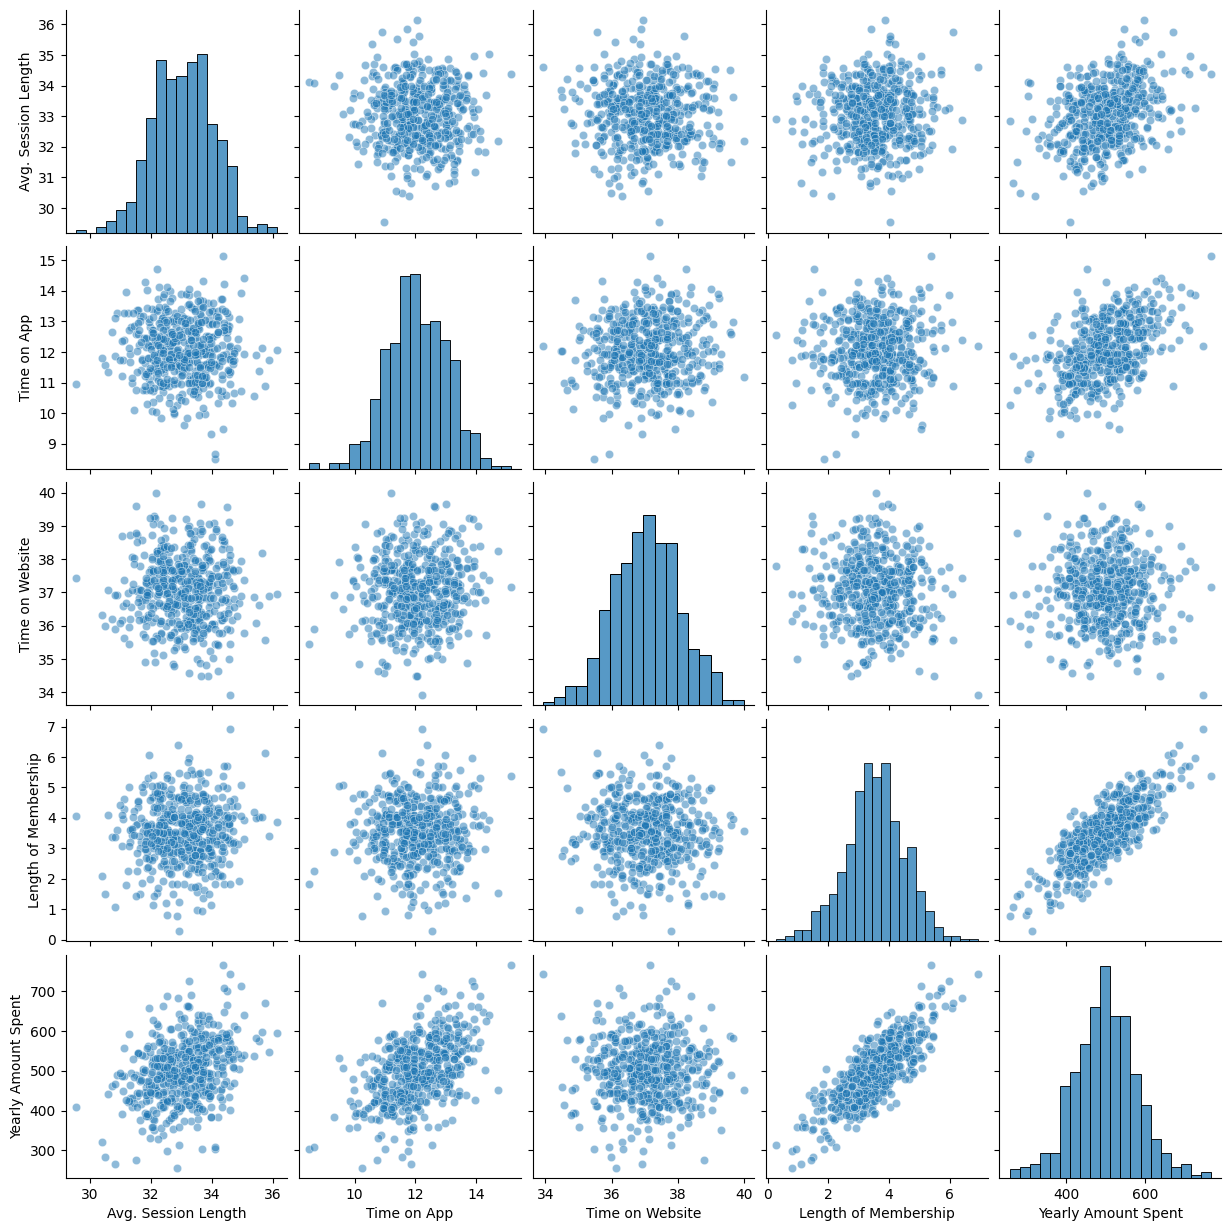

In [7]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.5})

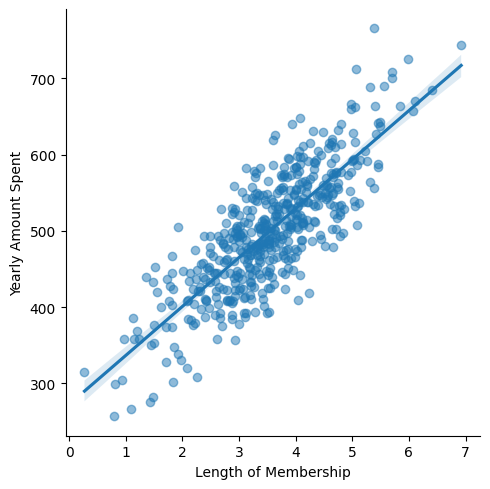

In [8]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df,scatter_kws={"alpha":0.5})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y = df["Yearly Amount Spent"]

In [11]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [16]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['coef'])
print(cdf)

                           coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [17]:
y_pred = lm.predict(X_test)
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of LM Model')

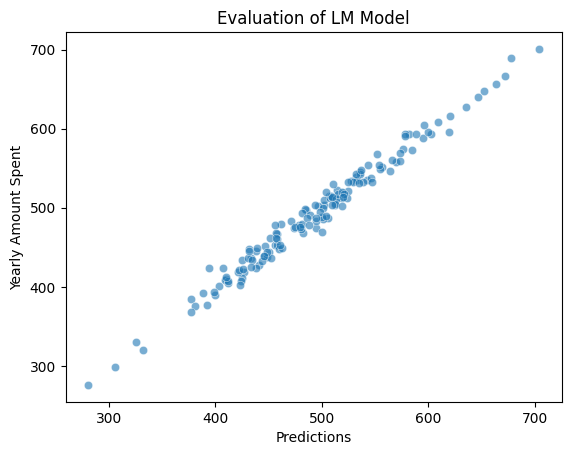

In [18]:
# Visualize data using seaborn
sns.scatterplot(x=y_pred,y=y_test,alpha=0.6)
plt.xlabel("Predictions")
plt.title("Evaluation of LM Model")

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [20]:
# Model Performance Evaluation using Regression Metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r^2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 8.426091641432068
Mean Squared Error: 103.9155413650325
RMSE: 10.193897260863114
r^2 Score: 0.9808757641125857


In [21]:
residuals = y_test - y_pred

In [22]:
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

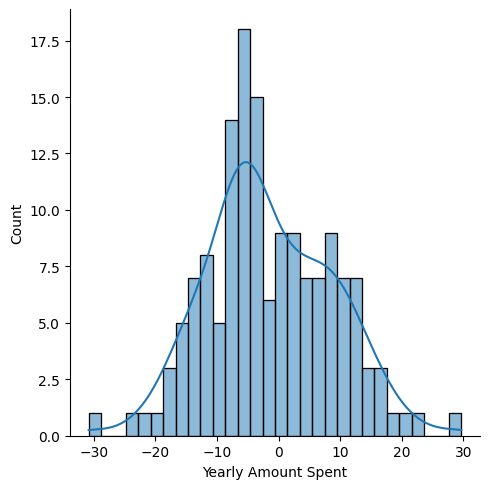

In [23]:
sns.displot(residuals, bins=30, kde=True)

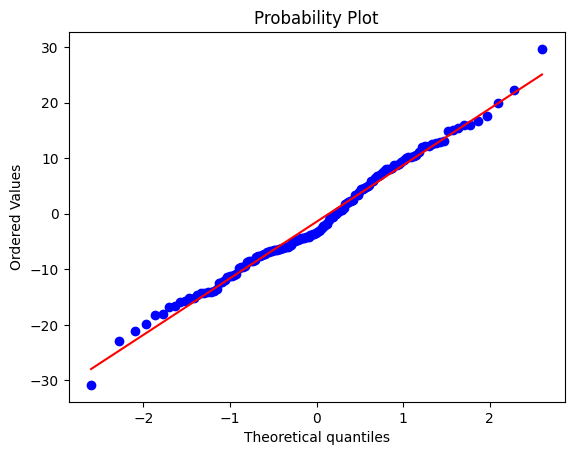

In [24]:
import pylab
import scipy.stats as stats

# visualizing residuals
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()